In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")
df.head(1)

,Age,EstimatedSalary,Purchased
0,19,19000,0


In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)


sc=StandardScaler()

X_train_scale=sc.fit_transform(X_train)
X_test_scale=sc.transform(X_test)


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3340 - loss: 1.0984 - val_accuracy: 0.6125 - val_loss: 0.6916
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3189 - loss: 1.0464 - val_accuracy: 0.6125 - val_loss: 0.6885
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3914 - loss: 0.9755 - val_accuracy: 0.6250 - val_loss: 0.6847
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3797 - loss: 0.9472 - val_accuracy: 0.6375 - val_loss: 0.6804
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4206 - loss: 0.8756 - val_accuracy: 0.6375 - val_loss: 0.6759
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4486 - loss: 0.8621 - val_accuracy: 0.6500 - val_loss: 0.6712
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4714 - loss: 0.8572 - val_accuracy: 0.6625 - val_loss: 0.6660
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5122 - loss: 0.8255 - val_accuracy: 0.6625 - val_loss: 0.

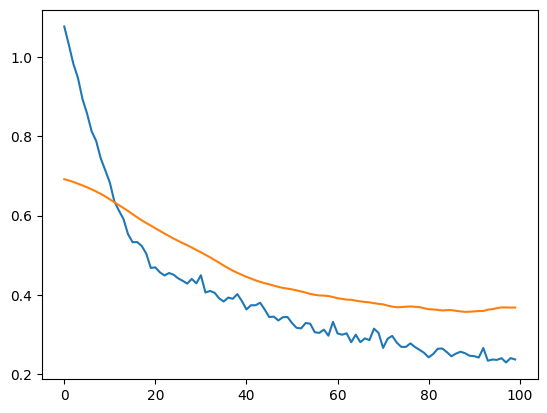

In [12]:
Model=Sequential()

Model.add(Dense(3,activation="relu",input_dim=2))
Model.add(BatchNormalization())
Model.add(Dense(2,activation="relu",input_dim=2))
Model.add(BatchNormalization())
Model.add(Dense(1,activation="sigmoid"))


Model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

History=Model.fit(X_train_scale,y_train,validation_data=(X_test_scale,y_test),epochs=100)


plt.plot(History.history["loss"])
plt.plot(History.history["val_loss"])
plt.show()